**Importing necessary libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load the Dataset**

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

**There are 50000 training images and 10000 test images**

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

**Plotting Images**

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

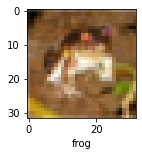

In [11]:
plot_sample(X_train, y_train, 0)

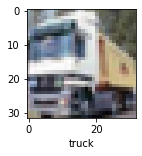

In [12]:
plot_sample(X_train, y_train, 1)

**Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255**

**Normalise the training data**

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Artificial Neural Network for Image Classification**

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.8121 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6215 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5381 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4800 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4296 - accuracy: 0.4964


**At the end of 5 epochs, accuracy is at around 49%**

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.56      0.53      1000
           1       0.36      0.85      0.50      1000
           2       0.54      0.12      0.20      1000
           3       0.44      0.12      0.18      1000
           4       0.46      0.39      0.42      1000
           5       0.35      0.45      0.39      1000
           6       0.60      0.45      0.51      1000
           7       0.45      0.62      0.52      1000
           8       0.50      0.68      0.58      1000
           9       0.58      0.23      0.33      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.42     10000
weighted avg       0.48      0.45      0.42     10000



**Build a Convolutional Neural Network to train the images**

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4782 - accuracy: 0.4674
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1199 - accuracy: 0.6071
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9918 - accuracy: 0.6550
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9126 - accuracy: 0.6848
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8524 - accuracy: 0.7057
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8039 - accuracy: 0.7210
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7601 - accuracy: 0.7363
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7195 - accuracy: 0.7506
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6866 - accuracy: 0.7630
Epoch 10/10
1563/1563 [==============================] - 57s 36m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9228 - accuracy: 0.6962


[0.9227727651596069, 0.6962000131607056]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[9.06761677e-04, 8.81205960e-06, 6.35786273e-04, 2.53823042e-01,
        1.25454064e-03, 2.85443757e-03, 6.45747362e-03, 4.32802226e-05,
        7.33682096e-01, 3.33833246e-04],
       [2.71104113e-03, 1.24624364e-01, 1.26465820e-04, 7.41536610e-07,
        2.88569936e-06, 5.49463186e-09, 1.73550276e-07, 9.10559876e-08,
        8.72437418e-01, 9.67956294e-05],
       [2.13233894e-03, 2.32856393e-01, 1.60179727e-04, 9.12156174e-05,
        6.91754940e-06, 9.26172015e-06, 3.59951628e-06, 4.41571183e-06,
        7.64492214e-01, 2.43509494e-04],
       [8.20279241e-01, 5.07196039e-03, 9.55711007e-02, 2.35850387e-03,
        5.59670366e-02, 3.63147032e-04, 5.69488434e-03, 2.33220722e-04,
        1.28700035e-02, 1.59090431e-03],
       [1.15578996e-05, 1.02881895e-04, 5.89586720e-02, 7.50766248e-02,
        3.77513319e-01, 1.76204415e-03, 4.85315561e-01, 1.19058495e-06,
        1.25640084e-03, 1.67574808e-06]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 8, 0, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

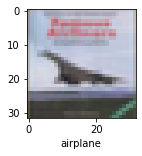

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'airplane'

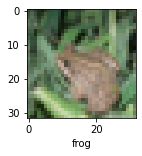

In [27]:
plot_sample(X_test, y_test,4)

In [26]:
classes[y_classes[4]]

'frog'